In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

def remove_i(x, i):
    """Drops the ith element of an array."""
    shape = (x.shape[0]-1,) + x.shape[1:]
    y = np.empty(shape, dtype=float)
    y[:i] = x[:i]
    y[i:] = x[i+1:]
    return y

def a(i, x, G, m):
    """The acceleration of the ith mass."""
    x_i = x[i]
    x_j = remove_i(x, i)
    m_j = remove_i(m, i)
    diff = x_j - x_i
    mag3 = np.sum(diff**2, axis=1)**1.5
    result = G * np.sum(diff * (m_j / mag3)[:,np.newaxis], axis=0)
    return result

def timestep(x0, v0, G, m, dt):
    """Computes the next position and velocity for all masses given 
    a initial conditions and a time step size.
    """
    N = len(x0)
    x1 = np.empty(x0.shape, dtype=float)
    v1 = np.empty(v0.shape, dtype=float)
    for i in range(N):
        a_i0 = a(i, x0, G, m)
        v1[i] = a_i0 * dt + v0[i]
        x1[i] = a_i0 * dt**2 + v0[i] * dt + x0[i]
    return x1, v1

def initial_cond(N, D):
    """Generates initial conditions for N unity masses at rest 
    starting at random positions in D-dimensional space.
    """
    x0 = np.random.rand(N, D)
    v0 = np.zeros((N, D), dtype=float)
    m = np.ones(N, dtype=float)
    return x0, v0, m    

In [2]:
def makefig(x, v, t):
    plt.plot(x[:,0], x[:,1], 'ro')
    if not np.all(v == 0.0):
        plt.quiver(x[:,0], x[:,1], v[:,0], v[:,1])
    plt.xlabel('x')
    plt.ylabel('y')
    plt.title('Time t = {0}'.format(t))
    plt.savefig('n-body-t{0}.svg'.format(t))

In [3]:
x0, v0, m = initial_cond(10, 2)
x1, v1 = timestep(x0, v0, 1.0, m, 1.0e-3)

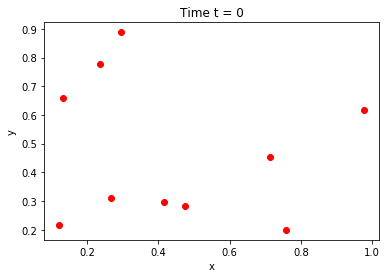

In [4]:
makefig(x0, v0, 0)

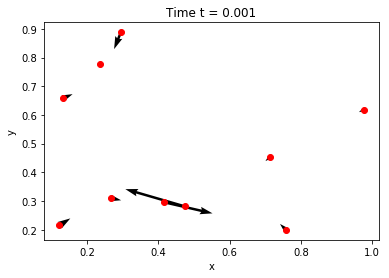

In [5]:
makefig(x1, v1, 1e-3)

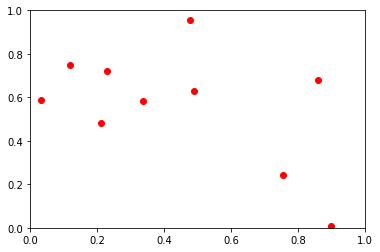

In [6]:
from matplotlib import animation
from IPython.display import HTML

fig = plt.figure()
ax = plt.axes(xlim=(0, 1.0), ylim=(0, 1.0))
viewport = [0.0, 1.0, 0.0, 1.0]

N = 10
x0, v0, m = initial_cond(N, 2)

def init():
    ax.clear()
    ax.plot(x0[:,0], x0[:,1], 'ro')
    if not np.all(v0 == 0.0):
        ax.quiver(x0[:,0], x0[:,1], v0[:,0], v0[:,1])
    ax.axis(viewport)
    return ax

def animate(i):
    global x0, v0
    x, v = timestep(x0, v0, 1.0, m, 1.0e-3)
    ax.clear()
    ax.plot(x[:,0], x[:,1], 'ro')
    if not np.all(v == 0.0):
        ax.quiver(x[:,0], x[:,1], v[:,0], v[:,1])
    ax.axis(viewport)
    x0, v0 = x, v
    return ax

anim = animation.FuncAnimation(fig, animate, frames=100, init_func=init, interval=100)

In [7]:
%%time
HTML(anim.to_jshtml())

CPU times: user 6.99 s, sys: 32 ms, total: 7.02 s
Wall time: 7.04 s


In [8]:
def simulate(N, D, S, G, dt):
    x0, v0, m = initial_cond(N, D)
    for s in range(S):
        x1, v1 = timestep(x0, v0, G, m, dt)
        x0, v0 = x1, v1

In [9]:
%%time
import time
#Ns = [2, 3, 4, 7, 10, 31, 72, 100, 1000, 10000]
#Ns = range(2, 101)
#Ns = [2, 4, 8, 20, 40, 80, 200, 400, 800, 2000]
#Ns = [2, 4, 8, 16, 32, 64, 128, 256, 512, 1024, 2048, 4096, 8192]
Ns = [2**x for x in range(3, 10)]
runtimes = []
for N in Ns:
    print("running", N)
    start = time.time()
    simulate(N, 3, 300, 1.0, 1e-3)
    stop = time.time()
    runtimes.append(stop - start)
print(runtimes)

running 8
running 16
running 32
running 64
running 128
running 256
running 512
[0.07704782485961914, 0.14507436752319336, 0.3143799304962158, 0.7553918361663818, 1.858489751815796, 5.212555885314941, 16.081108570098877]
CPU times: user 24.4 s, sys: 16 ms, total: 24.5 s
Wall time: 24.4 s


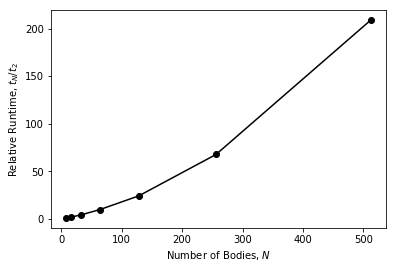

In [11]:
rts = np.array(runtimes) / runtimes[0]
plt.plot(Ns, rts, 'ko-')
plt.xlabel('Number of Bodies, $N$')
plt.ylabel('Relative Runtime, $t_N/t_2$')
plt.savefig('n-body-not-parallel-relative-runtimes.svg')

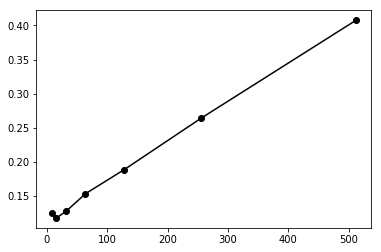

In [12]:
plt.plot(Ns, rts / Ns, 'ko-')

In [13]:
rts

array([  1.        ,   1.88291321,   4.08032194,   9.80419418,
        24.12124879,  67.65351124, 208.71593195])

In [14]:
rts[1:] / rts[:-1]

array([1.88291321, 2.16702603, 2.40279917, 2.46029896, 2.80472673,
       3.08507169])

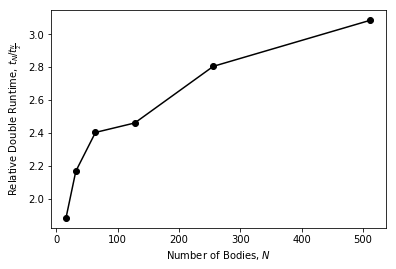

In [15]:
plt.plot(Ns[1:], rts[1:] / rts[:-1], 'ko-')
plt.xlabel('Number of Bodies, $N$')
plt.ylabel('Relative Double Runtime, $t_N/t_{\\frac{N}{2}}$')
plt.savefig('n-body-not-parallel-double-runtimes.svg')

In [19]:
Ns[5], runtimes[5]

(64, 0.7648842334747314)